In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("C:\Users\XBOX2\Desktop\project machine learning\My-First-ML-Project\Car Selling Price.csv"')

In [ ]:
df.head()

,Brand,Year,Fuel,Transmission,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Owner,Seller_Type,Selling_Price
0,Maruti Swift Dzire VDI,2014,Diesel,Manual,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4 kmpl,145500,First Owner,Individual,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Manual,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14 kmpl,120000,Second Owner,Individual,370000
2,Honda City 2017-2020 EXi,2006,Petrol,Manual,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7 kmpl,140000,Third Owner,Individual,158000
3,Hyundai i20 Sportz Diesel,2010,Diesel,Manual,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0 kmpl,127000,First Owner,Individual,225000
4,Maruti Swift VXI BSIII,2007,Petrol,Manual,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1 kmpl,120000,First Owner,Individual,130000


In [ ]:
df['cylindernumber'].unique()

KeyError: 'cylindernumber'

In [ ]:
numeric_col= df.select_dtypes(include = ['int64','float64']).columns

In [ ]:
df_numeric = df[numeric_col]

In [ ]:
correlation= df_numeric.corr()
print(correlation["price"].sort_values(ascending=False))

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<Axes: >

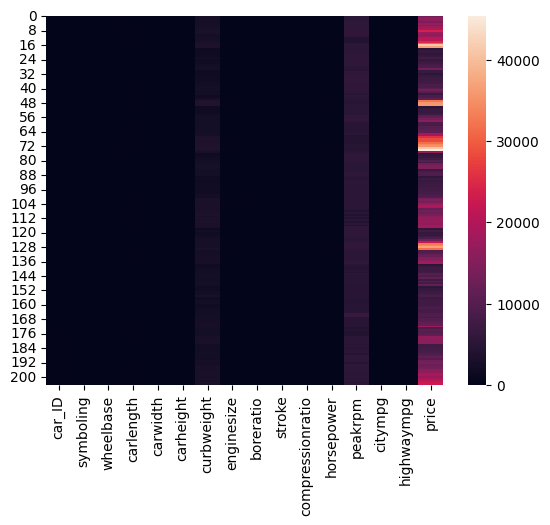

In [ ]:
sns.heatmap(df_numeric)

In [ ]:
X = df[["enginesize"]]
y = df["price"]          

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 15465458.96590847
R-squared Score: 0.8040958796678975


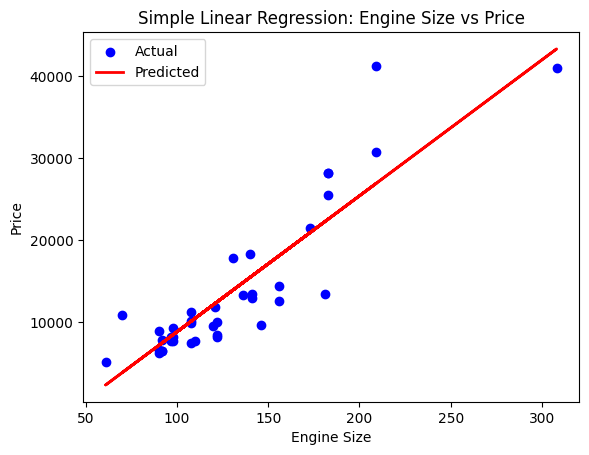

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Engine Size vs Price")
plt.legend()
plt.show()


In [ ]:
print(f"Regression equation: price = {model.coef_[0]:.2f} * engine_size + {model.intercept_:.2f}")

Regression equation: price = 165.84 * engine_size + -7741.77
